In [36]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
import optuna
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
import joblib
import random

In [37]:

data = pd.read_excel("C:/Users/ucbab/OneDrive/Documents/Pasc-Data.xlsx")

In [38]:
data

,Temperature,Catalyst dosage,MeOH-Oil ratio,Time,Biodiesel yield
0,60,2,12,1.38,47.0264
1,80,2,12,1.38,43.5159
2,60,4,12,1.38,33.2807
3,80,4,12,1.38,40.5441
4,60,2,24,1.38,84.0970
5,80,2,24,1.38,69.8490
6,60,4,24,1.38,91.5153
7,80,4,24,1.38,88.0412
8,60,2,12,3.13,42.5897
9,80,2,12,3.13,28.7631


In [39]:
x= data.drop(columns=['Biodiesel yield']).values
y=data['Biodiesel yield'].values

In [40]:
scaler_x = StandardScaler()
scaler_y= StandardScaler()
x = scaler_x.fit_transform(x)
y=scaler_y.fit_transform(y.reshape(-1,1))


In [41]:
SEED = 84
np.random.seed(SEED)


In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=SEED)


In [46]:
x_train

array([[-1.11803399,  1.11803399, -1.11803399, -1.1150469 ],
       [ 1.11803399,  1.11803399,  1.11803399, -1.1150469 ],
       [ 1.11803399,  1.11803399,  1.11803399,  1.12100972],
       [ 0.        ,  2.23606798,  0.        , -0.00340732],
       [ 0.        , -2.23606798,  0.        , -0.00340732],
       [ 0.        ,  0.        ,  0.        , -0.00340732],
       [ 0.        ,  0.        ,  0.        , -2.23946394],
       [-1.11803399, -1.11803399, -1.11803399,  1.12100972],
       [-1.11803399, -1.11803399,  1.11803399,  1.12100972],
       [ 1.11803399, -1.11803399, -1.11803399,  1.12100972],
       [ 0.        ,  0.        ,  0.        ,  2.2326493 ],
       [ 0.        ,  0.        , -2.23606798, -0.00340732],
       [-1.11803399, -1.11803399,  1.11803399, -1.1150469 ],
       [ 0.        ,  0.        ,  0.        , -0.00340732],
       [ 1.11803399, -1.11803399, -1.11803399, -1.1150469 ],
       [ 0.        ,  0.        ,  0.        , -0.00340732],
       [-1.11803399, -1.

In [108]:
x_train_unscaled = scaler_x.inverse_transform(x_train)

In [110]:
x_train_unscaled

array([[60.  ,  4.  , 12.  ,  1.38],
       [80.  ,  4.  , 24.  ,  1.38],
       [80.  ,  4.  , 24.  ,  3.13],
       [70.  ,  5.  , 18.  ,  2.25],
       [70.  ,  1.  , 18.  ,  2.25],
       [70.  ,  3.  , 18.  ,  2.25],
       [70.  ,  3.  , 18.  ,  0.5 ],
       [60.  ,  2.  , 12.  ,  3.13],
       [60.  ,  2.  , 24.  ,  3.13],
       [80.  ,  2.  , 12.  ,  3.13],
       [70.  ,  3.  , 18.  ,  4.  ],
       [70.  ,  3.  ,  6.  ,  2.25],
       [60.  ,  2.  , 24.  ,  1.38],
       [70.  ,  3.  , 18.  ,  2.25],
       [80.  ,  2.  , 12.  ,  1.38],
       [70.  ,  3.  , 18.  ,  2.25],
       [60.  ,  2.  , 12.  ,  1.38],
       [80.  ,  2.  , 24.  ,  3.13],
       [60.  ,  4.  , 24.  ,  3.13],
       [70.  ,  3.  , 30.  ,  2.25],
       [70.  ,  3.  , 18.  ,  2.25],
       [70.  ,  3.  , 18.  ,  2.25],
       [90.  ,  3.  , 18.  ,  2.25],
       [60.  ,  4.  , 12.  ,  3.13]])

In [111]:
x_test_unscaled = scaler_x.inverse_transform(x_test)
x_test_unscaled

array([[70.  ,  3.  , 18.  ,  2.25],
       [80.  ,  2.  , 24.  ,  1.38],
       [50.  ,  3.  , 18.  ,  2.25],
       [80.  ,  4.  , 12.  ,  1.38],
       [80.  ,  4.  , 12.  ,  3.13],
       [60.  ,  4.  , 24.  ,  1.38]])

In [120]:
y_train_unscaled = scaler_y.inverse_transform(y_train)
y_train_unscaled

array([[33.2807],
       [88.0412],
       [80.66  ],
       [72.43  ],
       [53.12  ],
       [77.2   ],
       [53.87  ],
       [42.5897],
       [76.52  ],
       [28.7631],
       [58.874 ],
       [20.59  ],
       [84.097 ],
       [67.713 ],
       [43.5159],
       [70.8   ],
       [47.0264],
       [41.98  ],
       [88.64  ],
       [95.35  ],
       [66.58  ],
       [62.559 ],
       [49.29  ],
       [39.9434]])

In [121]:
y_test_unscaled = scaler_y.inverse_transform(y_test)
y_test_unscaled

array([[67.29  ],
       [69.849 ],
       [63.7107],
       [40.5441],
       [36.8909],
       [91.5153]])

In [ ]:
best_score = -np.inf
best_model = None

def objective(trial): 
    global best_score, best_model


    params = {
    "n_estimators": trial.suggest_int("n_estimators", 500, 1500, step=100),
    "max_depth": trial.suggest_int("max_depth", 3, 12),
    "learning_rate": trial.suggest_float("learning_rate", 0.005, 0.05, log=True),  # Keep it moderate
    "subsample": trial.suggest_float("subsample", 0.6, 1.0),
    "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
    "gamma": trial.suggest_float("gamma", 0.0, 0.3),
    "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 1.0),
    "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 1.0),
    "min_child_weight": trial.suggest_int("min_child_weight", 1, 5),
    "max_delta_step": trial.suggest_int("max_delta_step", 0, 10),

}
    


    # Train the model
    model = XGBRegressor(
        **params,
        objective='reg:squarederror',
        random_state=SEED,
        n_jobs=-1,
        verbosity=0
    )

    kf = KFold(n_splits=5, shuffle=True, random_state=SEED)
    scores = cross_val_score(model, x_train, y_train, cv=kf, scoring="r2")
    mean_score = np.mean(scores)

    if mean_score > best_score:
        best_score = mean_score
        best_model = model
        model.fit(x_train, y_train)
        joblib.dump(model, 'best_xgb_bio_model.pkl')

    return mean_score


In [105]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50, show_progress_bar=True)

print("Best R² score from CV:", best_score)
print("Best hyperparameters:", study.best_params)
 

[I 2025-11-17 08:55:29,459] A new study created in memory with name: no-name-81c659e9-29a7-4a8b-8a70-dab91b975111
Best trial: 0. Best value: -0.142615:   2%|▏         | 1/50 [00:02<01:57,  2.39s/it]

[I 2025-11-17 08:55:31,852] Trial 0 finished with value: -0.14261472484188076 and parameters: {'n_estimators': 1300, 'max_depth': 8, 'learning_rate': 0.008310163301560897, 'subsample': 0.8743118888009112, 'colsample_bytree': 0.6214111032481818, 'gamma': 0.16977791783030033, 'reg_alpha': 0.09721069071897925, 'reg_lambda': 0.5284411962515441, 'min_child_weight': 3, 'max_delta_step': 10}. Best is trial 0 with value: -0.14261472484188076.


Best trial: 0. Best value: -0.142615:   4%|▍         | 2/50 [00:03<01:16,  1.60s/it]

[I 2025-11-17 08:55:32,889] Trial 1 finished with value: -0.2460067535930648 and parameters: {'n_estimators': 900, 'max_depth': 8, 'learning_rate': 0.03795998902991586, 'subsample': 0.9821601927043758, 'colsample_bytree': 0.7311703091787549, 'gamma': 0.13716792502376973, 'reg_alpha': 0.8102350697147949, 'reg_lambda': 0.8380037754398127, 'min_child_weight': 3, 'max_delta_step': 1}. Best is trial 0 with value: -0.14261472484188076.


Best trial: 0. Best value: -0.142615:   6%|▌         | 3/50 [00:04<01:09,  1.48s/it]

[I 2025-11-17 08:55:34,222] Trial 2 finished with value: -0.3418600857270201 and parameters: {'n_estimators': 900, 'max_depth': 6, 'learning_rate': 0.01626559557331902, 'subsample': 0.71417669055411, 'colsample_bytree': 0.8089404192593956, 'gamma': 0.28431949897694925, 'reg_alpha': 0.7936693464596896, 'reg_lambda': 0.8394378019031017, 'min_child_weight': 1, 'max_delta_step': 7}. Best is trial 0 with value: -0.14261472484188076.


Best trial: 0. Best value: -0.142615:   8%|▊         | 4/50 [00:05<00:57,  1.25s/it]

[I 2025-11-17 08:55:35,116] Trial 3 finished with value: -0.3707736072085507 and parameters: {'n_estimators': 500, 'max_depth': 3, 'learning_rate': 0.032934946907937454, 'subsample': 0.8818725469899918, 'colsample_bytree': 0.7142261021246722, 'gamma': 0.25526986459007, 'reg_alpha': 0.8739052847426584, 'reg_lambda': 0.2188065286782569, 'min_child_weight': 4, 'max_delta_step': 4}. Best is trial 0 with value: -0.14261472484188076.


Best trial: 0. Best value: -0.142615:  10%|█         | 5/50 [00:07<00:59,  1.32s/it]

[I 2025-11-17 08:55:36,576] Trial 4 finished with value: -0.4566836744726855 and parameters: {'n_estimators': 900, 'max_depth': 8, 'learning_rate': 0.006246614438201073, 'subsample': 0.8323566099101948, 'colsample_bytree': 0.9096417016197321, 'gamma': 0.08500548377127104, 'reg_alpha': 0.7577788960036416, 'reg_lambda': 0.027691366666438455, 'min_child_weight': 5, 'max_delta_step': 3}. Best is trial 0 with value: -0.14261472484188076.


Best trial: 0. Best value: -0.142615:  12%|█▏        | 6/50 [00:08<00:59,  1.35s/it]

[I 2025-11-17 08:55:37,987] Trial 5 finished with value: -0.3382817508558136 and parameters: {'n_estimators': 900, 'max_depth': 8, 'learning_rate': 0.009168111511600402, 'subsample': 0.6063663216956804, 'colsample_bytree': 0.7461468209569124, 'gamma': 0.10508156724752374, 'reg_alpha': 0.11247802288435327, 'reg_lambda': 0.5973627609101515, 'min_child_weight': 4, 'max_delta_step': 7}. Best is trial 0 with value: -0.14261472484188076.


Best trial: 0. Best value: -0.142615:  14%|█▍        | 7/50 [00:10<01:06,  1.55s/it]

[I 2025-11-17 08:55:39,932] Trial 6 finished with value: -0.30874278420192025 and parameters: {'n_estimators': 1200, 'max_depth': 11, 'learning_rate': 0.006990058718575766, 'subsample': 0.8412714873456916, 'colsample_bytree': 0.6339130788255356, 'gamma': 0.0551218043810849, 'reg_alpha': 0.7493094068808535, 'reg_lambda': 0.6191313556933246, 'min_child_weight': 4, 'max_delta_step': 4}. Best is trial 0 with value: -0.14261472484188076.


Best trial: 7. Best value: 0.130419:  16%|█▌        | 8/50 [00:13<01:28,  2.10s/it] 

[I 2025-11-17 08:55:43,203] Trial 7 finished with value: 0.1304185461397732 and parameters: {'n_estimators': 1300, 'max_depth': 9, 'learning_rate': 0.028145286485700357, 'subsample': 0.82713612080312, 'colsample_bytree': 0.6059608162887237, 'gamma': 0.019379185352262993, 'reg_alpha': 0.2681977168008697, 'reg_lambda': 0.8362753513626071, 'min_child_weight': 1, 'max_delta_step': 4}. Best is trial 7 with value: 0.1304185461397732.


Best trial: 7. Best value: 0.130419:  18%|█▊        | 9/50 [00:16<01:28,  2.16s/it]

[I 2025-11-17 08:55:45,498] Trial 8 finished with value: -0.2756416351766024 and parameters: {'n_estimators': 900, 'max_depth': 8, 'learning_rate': 0.0443108605018249, 'subsample': 0.903656340956025, 'colsample_bytree': 0.7416083027582877, 'gamma': 0.02741382207504257, 'reg_alpha': 0.6668305613589467, 'reg_lambda': 0.887993923155553, 'min_child_weight': 4, 'max_delta_step': 1}. Best is trial 7 with value: 0.1304185461397732.


Best trial: 7. Best value: 0.130419:  20%|██        | 10/50 [00:17<01:23,  2.08s/it]

[I 2025-11-17 08:55:47,402] Trial 9 finished with value: -0.4391467691994387 and parameters: {'n_estimators': 600, 'max_depth': 11, 'learning_rate': 0.006941225124548559, 'subsample': 0.9698205567066519, 'colsample_bytree': 0.8511829635708592, 'gamma': 0.22244455999096574, 'reg_alpha': 0.2207906836049267, 'reg_lambda': 0.488593390975655, 'min_child_weight': 5, 'max_delta_step': 7}. Best is trial 7 with value: 0.1304185461397732.


Best trial: 7. Best value: 0.130419:  22%|██▏       | 11/50 [00:21<01:39,  2.55s/it]

[I 2025-11-17 08:55:51,011] Trial 10 finished with value: 0.014927129675394646 and parameters: {'n_estimators': 1500, 'max_depth': 12, 'learning_rate': 0.022015889047727655, 'subsample': 0.730924076483881, 'colsample_bytree': 0.994441261159756, 'gamma': 0.001347017503770264, 'reg_alpha': 0.36058229913359696, 'reg_lambda': 0.9938782488216222, 'min_child_weight': 1, 'max_delta_step': 10}. Best is trial 7 with value: 0.1304185461397732.


Best trial: 7. Best value: 0.130419:  24%|██▍       | 12/50 [00:25<01:47,  2.84s/it]

[I 2025-11-17 08:55:54,519] Trial 11 finished with value: -0.011308628034969459 and parameters: {'n_estimators': 1500, 'max_depth': 12, 'learning_rate': 0.021443719494355428, 'subsample': 0.7426289756865648, 'colsample_bytree': 0.9816028785143646, 'gamma': 0.004025425884650697, 'reg_alpha': 0.3894400016328585, 'reg_lambda': 0.953977163259382, 'min_child_weight': 1, 'max_delta_step': 10}. Best is trial 7 with value: 0.1304185461397732.


Best trial: 7. Best value: 0.130419:  26%|██▌       | 13/50 [00:28<01:50,  2.99s/it]

[I 2025-11-17 08:55:57,863] Trial 12 finished with value: -0.10918158260539527 and parameters: {'n_estimators': 1500, 'max_depth': 10, 'learning_rate': 0.023209506168808566, 'subsample': 0.767640258337127, 'colsample_bytree': 0.9760528412620701, 'gamma': 0.004469610302245882, 'reg_alpha': 0.4401659062735053, 'reg_lambda': 0.9915499929539042, 'min_child_weight': 2, 'max_delta_step': 6}. Best is trial 7 with value: 0.1304185461397732.


Best trial: 7. Best value: 0.130419:  28%|██▊       | 14/50 [00:31<01:43,  2.88s/it]

[I 2025-11-17 08:56:00,483] Trial 13 finished with value: -0.08246716757251127 and parameters: {'n_estimators': 1300, 'max_depth': 6, 'learning_rate': 0.025995726198178328, 'subsample': 0.6721866816815363, 'colsample_bytree': 0.8863265459154107, 'gamma': 0.05733537336213411, 'reg_alpha': 0.2841855447654938, 'reg_lambda': 0.7021888596047093, 'min_child_weight': 2, 'max_delta_step': 8}. Best is trial 7 with value: 0.1304185461397732.


Best trial: 7. Best value: 0.130419:  30%|███       | 15/50 [00:33<01:32,  2.64s/it]

[I 2025-11-17 08:56:02,558] Trial 14 finished with value: -0.23287358216929643 and parameters: {'n_estimators': 1200, 'max_depth': 10, 'learning_rate': 0.01366066935853338, 'subsample': 0.7967731818410735, 'colsample_bytree': 0.6661322610774423, 'gamma': 0.18128767366189918, 'reg_alpha': 0.573534301806926, 'reg_lambda': 0.7444408761523256, 'min_child_weight': 1, 'max_delta_step': 3}. Best is trial 7 with value: 0.1304185461397732.


Best trial: 7. Best value: 0.130419:  32%|███▏      | 16/50 [00:35<01:28,  2.60s/it]

[I 2025-11-17 08:56:05,085] Trial 15 finished with value: -0.23667804692765682 and parameters: {'n_estimators': 1500, 'max_depth': 12, 'learning_rate': 0.014496421545319126, 'subsample': 0.6761523015864115, 'colsample_bytree': 0.8120335704775267, 'gamma': 0.05081653734311571, 'reg_alpha': 0.9889402062267378, 'reg_lambda': 0.44847595165926, 'min_child_weight': 2, 'max_delta_step': 9}. Best is trial 7 with value: 0.1304185461397732.


Best trial: 7. Best value: 0.130419:  34%|███▍      | 17/50 [00:37<01:20,  2.45s/it]

[I 2025-11-17 08:56:07,166] Trial 16 finished with value: -0.1755171596441107 and parameters: {'n_estimators': 1300, 'max_depth': 10, 'learning_rate': 0.03188098335051811, 'subsample': 0.7981737307448414, 'colsample_bytree': 0.9045437366437019, 'gamma': 0.10251106529407487, 'reg_alpha': 0.27841514614525653, 'reg_lambda': 0.7533571298152559, 'min_child_weight': 1, 'max_delta_step': 5}. Best is trial 7 with value: 0.1304185461397732.


Best trial: 7. Best value: 0.130419:  36%|███▌      | 18/50 [00:39<01:16,  2.38s/it]

[I 2025-11-17 08:56:09,384] Trial 17 finished with value: -0.186900266172667 and parameters: {'n_estimators': 1400, 'max_depth': 6, 'learning_rate': 0.018621088335267707, 'subsample': 0.6210470384157618, 'colsample_bytree': 0.6781558142860495, 'gamma': 0.03330583744480499, 'reg_alpha': 0.5400627385457841, 'reg_lambda': 0.32421010364062886, 'min_child_weight': 2, 'max_delta_step': 0}. Best is trial 7 with value: 0.1304185461397732.


Best trial: 7. Best value: 0.130419:  38%|███▊      | 19/50 [00:41<01:10,  2.26s/it]

[I 2025-11-17 08:56:11,378] Trial 18 finished with value: -0.236499987375546 and parameters: {'n_estimators': 1100, 'max_depth': 3, 'learning_rate': 0.010898242824067735, 'subsample': 0.7153815916031947, 'colsample_bytree': 0.9445209297044582, 'gamma': 0.12997045882238611, 'reg_alpha': 0.004052088135760856, 'reg_lambda': 0.9951307592077361, 'min_child_weight': 1, 'max_delta_step': 5}. Best is trial 7 with value: 0.1304185461397732.


Best trial: 7. Best value: 0.130419:  40%|████      | 20/50 [00:44<01:07,  2.26s/it]

[I 2025-11-17 08:56:13,624] Trial 19 finished with value: -0.05148563078469097 and parameters: {'n_estimators': 1100, 'max_depth': 11, 'learning_rate': 0.049804373065717535, 'subsample': 0.9212545100757004, 'colsample_bytree': 0.7808585352317755, 'gamma': 0.08488101199170292, 'reg_alpha': 0.375366875605675, 'reg_lambda': 0.8449558384073449, 'min_child_weight': 3, 'max_delta_step': 2}. Best is trial 7 with value: 0.1304185461397732.


Best trial: 7. Best value: 0.130419:  42%|████▏     | 21/50 [00:45<01:00,  2.07s/it]

[I 2025-11-17 08:56:15,269] Trial 20 finished with value: -0.24569369586636097 and parameters: {'n_estimators': 1400, 'max_depth': 9, 'learning_rate': 0.0279416875815037, 'subsample': 0.7593566500901193, 'colsample_bytree': 0.8576241892966414, 'gamma': 0.21025348507024744, 'reg_alpha': 0.18695542452579464, 'reg_lambda': 0.7057984669448473, 'min_child_weight': 2, 'max_delta_step': 9}. Best is trial 7 with value: 0.1304185461397732.


Best trial: 7. Best value: 0.130419:  44%|████▍     | 22/50 [00:48<01:01,  2.19s/it]

[I 2025-11-17 08:56:17,738] Trial 21 finished with value: -0.02237072190383511 and parameters: {'n_estimators': 1500, 'max_depth': 12, 'learning_rate': 0.020849259160034654, 'subsample': 0.7647206483459768, 'colsample_bytree': 0.999821608021431, 'gamma': 0.0053723939930651055, 'reg_alpha': 0.3908886431194413, 'reg_lambda': 0.9242742195263609, 'min_child_weight': 1, 'max_delta_step': 10}. Best is trial 7 with value: 0.1304185461397732.


Best trial: 7. Best value: 0.130419:  46%|████▌     | 23/50 [00:51<01:03,  2.36s/it]

[I 2025-11-17 08:56:20,490] Trial 22 finished with value: -0.0019829513742009473 and parameters: {'n_estimators': 1400, 'max_depth': 12, 'learning_rate': 0.019402889009510683, 'subsample': 0.7293442573431914, 'colsample_bytree': 0.9538610285860062, 'gamma': 0.004256284643925209, 'reg_alpha': 0.3264382484533176, 'reg_lambda': 0.9446161508268509, 'min_child_weight': 1, 'max_delta_step': 9}. Best is trial 7 with value: 0.1304185461397732.


Best trial: 7. Best value: 0.130419:  48%|████▊     | 24/50 [00:53<01:02,  2.39s/it]

[I 2025-11-17 08:56:22,936] Trial 23 finished with value: -0.05506352098209435 and parameters: {'n_estimators': 1400, 'max_depth': 11, 'learning_rate': 0.017501906937496817, 'subsample': 0.6757945368287699, 'colsample_bytree': 0.943416603544475, 'gamma': 0.026674620391842645, 'reg_alpha': 0.31532957154615715, 'reg_lambda': 0.8097976253953174, 'min_child_weight': 1, 'max_delta_step': 8}. Best is trial 7 with value: 0.1304185461397732.


Best trial: 7. Best value: 0.130419:  50%|█████     | 25/50 [00:55<00:58,  2.34s/it]

[I 2025-11-17 08:56:25,155] Trial 24 finished with value: -0.15410098567638242 and parameters: {'n_estimators': 1200, 'max_depth': 9, 'learning_rate': 0.012453042941039326, 'subsample': 0.8337166579250563, 'colsample_bytree': 0.9336435529715214, 'gamma': 0.04003742300397496, 'reg_alpha': 0.49140191724653115, 'reg_lambda': 0.90563013901094, 'min_child_weight': 2, 'max_delta_step': 9}. Best is trial 7 with value: 0.1304185461397732.


Best trial: 25. Best value: 0.14474:  52%|█████▏    | 26/50 [00:58<01:02,  2.61s/it]

[I 2025-11-17 08:56:28,397] Trial 25 finished with value: 0.14473952650175503 and parameters: {'n_estimators': 1400, 'max_depth': 12, 'learning_rate': 0.02684170241827722, 'subsample': 0.7169054593983775, 'colsample_bytree': 0.8725991516348195, 'gamma': 0.0008193119863755421, 'reg_alpha': 0.1802902769651552, 'reg_lambda': 0.6274618688798561, 'min_child_weight': 1, 'max_delta_step': 6}. Best is trial 25 with value: 0.14473952650175503.


Best trial: 25. Best value: 0.14474:  54%|█████▍    | 27/50 [01:01<00:56,  2.44s/it]

[I 2025-11-17 08:56:30,461] Trial 26 finished with value: 0.04707326268938976 and parameters: {'n_estimators': 1100, 'max_depth': 5, 'learning_rate': 0.027389316599902527, 'subsample': 0.6916955174766843, 'colsample_bytree': 0.6000921847055711, 'gamma': 0.06946823823071824, 'reg_alpha': 0.15602143697883475, 'reg_lambda': 0.6526843065795074, 'min_child_weight': 2, 'max_delta_step': 5}. Best is trial 25 with value: 0.14473952650175503.


Best trial: 27. Best value: 0.146457:  56%|█████▌    | 28/50 [01:03<00:52,  2.38s/it]

[I 2025-11-17 08:56:32,695] Trial 27 finished with value: 0.14645714047564792 and parameters: {'n_estimators': 1100, 'max_depth': 5, 'learning_rate': 0.03508211639641761, 'subsample': 0.6348229512987636, 'colsample_bytree': 0.6048625291380347, 'gamma': 0.07114867646711405, 'reg_alpha': 0.039066407545910176, 'reg_lambda': 0.6279806154615828, 'min_child_weight': 2, 'max_delta_step': 6}. Best is trial 27 with value: 0.14645714047564792.


Best trial: 27. Best value: 0.146457:  58%|█████▊    | 29/50 [01:04<00:43,  2.09s/it]

[I 2025-11-17 08:56:34,111] Trial 28 finished with value: -0.11627051460830531 and parameters: {'n_estimators': 700, 'max_depth': 4, 'learning_rate': 0.038879235023053425, 'subsample': 0.6409786428037181, 'colsample_bytree': 0.6635013664076879, 'gamma': 0.1101241523289513, 'reg_alpha': 0.042246290196309835, 'reg_lambda': 0.4108930404694291, 'min_child_weight': 3, 'max_delta_step': 6}. Best is trial 27 with value: 0.14645714047564792.


Best trial: 27. Best value: 0.146457:  60%|██████    | 30/50 [01:06<00:40,  2.03s/it]

[I 2025-11-17 08:56:35,981] Trial 29 finished with value: -0.056662198167023184 and parameters: {'n_estimators': 1000, 'max_depth': 7, 'learning_rate': 0.03329335022146093, 'subsample': 0.6373748531437718, 'colsample_bytree': 0.6374598623844551, 'gamma': 0.07370163653719768, 'reg_alpha': 0.08247862562293082, 'reg_lambda': 0.5726964832059721, 'min_child_weight': 3, 'max_delta_step': 6}. Best is trial 27 with value: 0.14645714047564792.


Best trial: 27. Best value: 0.146457:  62%|██████▏   | 31/50 [01:08<00:40,  2.15s/it]

[I 2025-11-17 08:56:38,429] Trial 30 finished with value: -0.08227882703224525 and parameters: {'n_estimators': 1300, 'max_depth': 7, 'learning_rate': 0.042775019823453296, 'subsample': 0.6576441472750758, 'colsample_bytree': 0.6061449812671045, 'gamma': 0.15667257290990175, 'reg_alpha': 0.12366857465944783, 'reg_lambda': 0.5315544610674381, 'min_child_weight': 2, 'max_delta_step': 4}. Best is trial 27 with value: 0.14645714047564792.


Best trial: 27. Best value: 0.146457:  64%|██████▍   | 32/50 [01:10<00:37,  2.09s/it]

[I 2025-11-17 08:56:40,387] Trial 31 finished with value: 0.03454307763489597 and parameters: {'n_estimators': 1100, 'max_depth': 5, 'learning_rate': 0.02671614399656185, 'subsample': 0.7029520084743298, 'colsample_bytree': 0.6021446938862154, 'gamma': 0.06939082783219021, 'reg_alpha': 0.1818036339637709, 'reg_lambda': 0.6284682673340775, 'min_child_weight': 2, 'max_delta_step': 5}. Best is trial 27 with value: 0.14645714047564792.


Best trial: 27. Best value: 0.146457:  66%|██████▌   | 33/50 [01:12<00:34,  2.04s/it]

[I 2025-11-17 08:56:42,302] Trial 32 finished with value: 0.1244985031298385 and parameters: {'n_estimators': 1000, 'max_depth': 5, 'learning_rate': 0.029864939687782296, 'subsample': 0.6793833467819971, 'colsample_bytree': 0.7015089470009306, 'gamma': 0.024174176756945748, 'reg_alpha': 0.230173186592099, 'reg_lambda': 0.6684306270102888, 'min_child_weight': 2, 'max_delta_step': 3}. Best is trial 27 with value: 0.14645714047564792.


Best trial: 33. Best value: 0.171052:  68%|██████▊   | 34/50 [01:14<00:32,  2.03s/it]

[I 2025-11-17 08:56:44,309] Trial 33 finished with value: 0.17105174793209948 and parameters: {'n_estimators': 800, 'max_depth': 5, 'learning_rate': 0.03580795759172135, 'subsample': 0.646741382612144, 'colsample_bytree': 0.6930516481639902, 'gamma': 0.023576949232386304, 'reg_alpha': 0.21718428696525768, 'reg_lambda': 0.7635977892941025, 'min_child_weight': 1, 'max_delta_step': 3}. Best is trial 33 with value: 0.17105174793209948.


Best trial: 33. Best value: 0.171052:  70%|███████   | 35/50 [01:16<00:28,  1.87s/it]

[I 2025-11-17 08:56:45,801] Trial 34 finished with value: 0.1577803313524308 and parameters: {'n_estimators': 800, 'max_depth': 4, 'learning_rate': 0.03713983625760046, 'subsample': 0.6463875553308298, 'colsample_bytree': 0.6388405517729969, 'gamma': 0.040279124739023606, 'reg_alpha': 0.054120919119621747, 'reg_lambda': 0.7772618367429702, 'min_child_weight': 1, 'max_delta_step': 2}. Best is trial 33 with value: 0.17105174793209948.


Best trial: 33. Best value: 0.171052:  72%|███████▏  | 36/50 [01:17<00:24,  1.72s/it]

[I 2025-11-17 08:56:47,166] Trial 35 finished with value: 0.15285699138312 and parameters: {'n_estimators': 800, 'max_depth': 4, 'learning_rate': 0.037403831025849, 'subsample': 0.6063180729058797, 'colsample_bytree': 0.6423919383484772, 'gamma': 0.052268413583053175, 'reg_alpha': 0.0037063108479966286, 'reg_lambda': 0.7611204588718893, 'min_child_weight': 1, 'max_delta_step': 2}. Best is trial 33 with value: 0.17105174793209948.


Best trial: 33. Best value: 0.171052:  74%|███████▍  | 37/50 [01:18<00:20,  1.59s/it]

[I 2025-11-17 08:56:48,453] Trial 36 finished with value: 0.018098839078881924 and parameters: {'n_estimators': 800, 'max_depth': 4, 'learning_rate': 0.0370517541595911, 'subsample': 0.6029758575611477, 'colsample_bytree': 0.6431368472716621, 'gamma': 0.12632633426643441, 'reg_alpha': 0.01433552740474811, 'reg_lambda': 0.7769004168817284, 'min_child_weight': 1, 'max_delta_step': 2}. Best is trial 33 with value: 0.17105174793209948.


Best trial: 33. Best value: 0.171052:  76%|███████▌  | 38/50 [01:20<00:18,  1.53s/it]

[I 2025-11-17 08:56:49,849] Trial 37 finished with value: 0.1371512133136405 and parameters: {'n_estimators': 800, 'max_depth': 4, 'learning_rate': 0.036345861967191376, 'subsample': 0.6369963406833494, 'colsample_bytree': 0.7028363241013633, 'gamma': 0.04872387146466261, 'reg_alpha': 0.07795122834803078, 'reg_lambda': 0.7327929658671818, 'min_child_weight': 1, 'max_delta_step': 1}. Best is trial 33 with value: 0.17105174793209948.


Best trial: 33. Best value: 0.171052:  78%|███████▊  | 39/50 [01:21<00:16,  1.46s/it]

[I 2025-11-17 08:56:51,148] Trial 38 finished with value: 0.0768902850065385 and parameters: {'n_estimators': 800, 'max_depth': 3, 'learning_rate': 0.045219328082376394, 'subsample': 0.6208556733709277, 'colsample_bytree': 0.6864316364081262, 'gamma': 0.09245322428145625, 'reg_alpha': 0.07584078108831482, 'reg_lambda': 0.5687393279772349, 'min_child_weight': 1, 'max_delta_step': 2}. Best is trial 33 with value: 0.17105174793209948.


Best trial: 33. Best value: 0.171052:  80%|████████  | 40/50 [01:22<00:13,  1.38s/it]

[I 2025-11-17 08:56:52,322] Trial 39 finished with value: -0.26545870578566594 and parameters: {'n_estimators': 700, 'max_depth': 4, 'learning_rate': 0.04017185822380139, 'subsample': 0.6585823306344256, 'colsample_bytree': 0.6525778690069025, 'gamma': 0.2761089282569509, 'reg_alpha': 0.12730155678772676, 'reg_lambda': 0.07851414813221913, 'min_child_weight': 3, 'max_delta_step': 3}. Best is trial 33 with value: 0.17105174793209948.


Best trial: 33. Best value: 0.171052:  82%|████████▏ | 41/50 [01:23<00:11,  1.27s/it]

[I 2025-11-17 08:56:53,363] Trial 40 finished with value: 0.12941248214124634 and parameters: {'n_estimators': 500, 'max_depth': 6, 'learning_rate': 0.04826205916818747, 'subsample': 0.6013255021717373, 'colsample_bytree': 0.7270060075984868, 'gamma': 0.040451270309968146, 'reg_alpha': 0.038910840775101964, 'reg_lambda': 0.7977225631082516, 'min_child_weight': 1, 'max_delta_step': 0}. Best is trial 33 with value: 0.17105174793209948.


Best trial: 41. Best value: 0.217663:  84%|████████▍ | 42/50 [01:25<00:11,  1.45s/it]

[I 2025-11-17 08:56:55,215] Trial 41 finished with value: 0.21766264909147007 and parameters: {'n_estimators': 700, 'max_depth': 5, 'learning_rate': 0.0321287113192807, 'subsample': 0.6477902405282064, 'colsample_bytree': 0.6246854287442805, 'gamma': 0.01693805801713453, 'reg_alpha': 0.14330582425636032, 'reg_lambda': 0.6827360600552995, 'min_child_weight': 1, 'max_delta_step': 1}. Best is trial 41 with value: 0.21766264909147007.


Best trial: 42. Best value: 0.222626:  86%|████████▌ | 43/50 [01:27<00:11,  1.59s/it]

[I 2025-11-17 08:56:57,138] Trial 42 finished with value: 0.22262641746618286 and parameters: {'n_estimators': 700, 'max_depth': 5, 'learning_rate': 0.03647798912292541, 'subsample': 0.6231923690277562, 'colsample_bytree': 0.6427350641137268, 'gamma': 0.021787890306515085, 'reg_alpha': 0.06098918316741409, 'reg_lambda': 0.864153279509041, 'min_child_weight': 1, 'max_delta_step': 1}. Best is trial 42 with value: 0.22262641746618286.


Best trial: 42. Best value: 0.222626:  88%|████████▊ | 44/50 [01:29<00:09,  1.64s/it]

[I 2025-11-17 08:56:58,877] Trial 43 finished with value: 0.18615953747823522 and parameters: {'n_estimators': 700, 'max_depth': 3, 'learning_rate': 0.031336964535075985, 'subsample': 0.6515983337136598, 'colsample_bytree': 0.6270084209366248, 'gamma': 0.01437166077732284, 'reg_alpha': 0.12142860620245677, 'reg_lambda': 0.8436680572641544, 'min_child_weight': 1, 'max_delta_step': 1}. Best is trial 42 with value: 0.22262641746618286.


Best trial: 42. Best value: 0.222626:  90%|█████████ | 45/50 [01:31<00:08,  1.65s/it]

[I 2025-11-17 08:57:00,577] Trial 44 finished with value: 0.08929496238955767 and parameters: {'n_estimators': 700, 'max_depth': 3, 'learning_rate': 0.024112657605886434, 'subsample': 0.6584126713362182, 'colsample_bytree': 0.631766422435315, 'gamma': 0.017386145574958992, 'reg_alpha': 0.23017871775930912, 'reg_lambda': 0.850948865462186, 'min_child_weight': 1, 'max_delta_step': 1}. Best is trial 42 with value: 0.22262641746618286.


Best trial: 42. Best value: 0.222626:  92%|█████████▏| 46/50 [01:32<00:06,  1.54s/it]

[I 2025-11-17 08:57:01,854] Trial 45 finished with value: 0.12254796638110221 and parameters: {'n_estimators': 600, 'max_depth': 3, 'learning_rate': 0.03195142070374823, 'subsample': 0.693251707725067, 'colsample_bytree': 0.6245041654800282, 'gamma': 0.01694520788660312, 'reg_alpha': 0.13956932329478805, 'reg_lambda': 0.8825966521955846, 'min_child_weight': 1, 'max_delta_step': 1}. Best is trial 42 with value: 0.22262641746618286.


Best trial: 42. Best value: 0.222626:  94%|█████████▍| 47/50 [01:34<00:04,  1.59s/it]

[I 2025-11-17 08:57:03,563] Trial 46 finished with value: -0.05056613530135148 and parameters: {'n_estimators': 600, 'max_depth': 5, 'learning_rate': 0.005054138183576398, 'subsample': 0.6440270009394702, 'colsample_bytree': 0.6766597808089878, 'gamma': 0.032713540237392334, 'reg_alpha': 0.10551023781966051, 'reg_lambda': 0.6892329827087522, 'min_child_weight': 1, 'max_delta_step': 0}. Best is trial 42 with value: 0.22262641746618286.


Best trial: 42. Best value: 0.222626:  96%|█████████▌| 48/50 [01:35<00:02,  1.48s/it]

[I 2025-11-17 08:57:04,795] Trial 47 finished with value: -0.45953631490867763 and parameters: {'n_estimators': 700, 'max_depth': 6, 'learning_rate': 0.029835962962609944, 'subsample': 0.6209735319075602, 'colsample_bytree': 0.6558898816810254, 'gamma': 0.019780968501888707, 'reg_alpha': 0.22857047514748785, 'reg_lambda': 0.8719022998383719, 'min_child_weight': 5, 'max_delta_step': 2}. Best is trial 42 with value: 0.22262641746618286.


Best trial: 42. Best value: 0.222626:  98%|█████████▊| 49/50 [01:36<00:01,  1.46s/it]

[I 2025-11-17 08:57:06,212] Trial 48 finished with value: -0.05945441039167374 and parameters: {'n_estimators': 600, 'max_depth': 7, 'learning_rate': 0.04244767044280684, 'subsample': 0.6565487550514048, 'colsample_bytree': 0.7701681453095977, 'gamma': 0.04069772576133403, 'reg_alpha': 0.07571602140457481, 'reg_lambda': 0.816852027536657, 'min_child_weight': 1, 'max_delta_step': 1}. Best is trial 42 with value: 0.22262641746618286.


Best trial: 42. Best value: 0.222626: 100%|██████████| 50/50 [01:38<00:00,  1.97s/it]

[I 2025-11-17 08:57:08,018] Trial 49 finished with value: -0.11497298322061429 and parameters: {'n_estimators': 900, 'max_depth': 4, 'learning_rate': 0.023956943600831428, 'subsample': 0.6213592214466848, 'colsample_bytree': 0.7025905871456503, 'gamma': 0.01334614264158457, 'reg_alpha': 0.6893208123834045, 'reg_lambda': 0.7132384612091158, 'min_child_weight': 1, 'max_delta_step': 0}. Best is trial 42 with value: 0.22262641746618286.
Best R² score from CV: 0.22262641746618286
Best hyperparameters: {'n_estimators': 700, 'max_depth': 5, 'learning_rate': 0.03647798912292541, 'subsample': 0.6231923690277562, 'colsample_bytree': 0.6427350641137268, 'gamma': 0.021787890306515085, 'reg_alpha': 0.06098918316741409, 'reg_lambda': 0.864153279509041, 'min_child_weight': 1, 'max_delta_step': 1}


In [ ]:

# Load the best saved model
xgb_model = joblib.load('best_xgb_bio_model.pkl')

# Predict
y_train_pred = xgb_model.predict(x_train)
y_test_pred = xgb_model.predict(x_test)

# R² Scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")


Train R²: 0.9705
Test R²: 0.9353


In [ ]:
# Display best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)
print("Best validation R² Score from Optuna:", study.best_value)

Best Hyperparameters: {'n_estimators': 1400, 'max_depth': 10, 'learning_rate': 0.016362244890755245, 'subsample': 0.8179244139184247, 'colsample_bytree': 0.9404199818832618, 'gamma': 0.00036522241546149497, 'reg_alpha': 0.06746430023555638, 'reg_lambda': 0.04348637075399563, 'min_child_weight': 3, 'max_delta_step': 0}
Best validation R² Score from Optuna: 0.18959922001893403


In [17]:
# Predict on the full dataset
y_pred_full = xgb_model.predict(x)

# Calculate R² score for the full dataset
r2_full = r2_score(y, y_pred_full)
print(f'R² Score for the full dataset: {r2_full:.4f}')

R² Score for the full dataset: 0.9644


In [18]:
import xgboost

print(xgboost.__version__)

2.1.4


In [19]:
mse_full = mean_squared_error(y, y_pred_full)
print(f'Mean Squared Error for the full dataset: {mse_full:.4f}')

Mean Squared Error for the full dataset: 0.0356


In [20]:
rmse_full = np.sqrt(mean_squared_error(y, y_pred_full))
print(f'Root Mean Squared Error for the full dataset: {rmse_full:.4f}')

Root Mean Squared Error for the full dataset: 0.1887


In [21]:
# Calculate Average Absolute Deviation (AAD) for the full dataset
aad_full = np.mean(np.abs(y.flatten() - y_pred_full))
print(f'Average Absolute Deviation (AAD) for the full dataset: {aad_full:.4f}')

Average Absolute Deviation (AAD) for the full dataset: 0.1432


In [23]:
# Calculate AIC for the full dataset
n = len(y)
residual_sum_of_squares = np.sum((y.flatten() - y_pred_full) ** 2)
k = len(xgb_model.get_params())  # number of model parameters

aic_full = n * np.log(residual_sum_of_squares / n) + 2 * k
print(f'AIC for the full dataset: {aic_full:.4f}')

AIC for the full dataset: -22.0692


In [24]:
y_pred_full

array([-0.61059785, -1.0412644 , -1.4037389 , -1.1251904 ,  1.1673524 ,
        0.15632686,  1.6710362 ,  1.3600675 , -0.84617186, -1.6625435 ,
       -1.1813964 , -1.2637925 ,  0.654161  , -0.78452855,  1.608535  ,
        0.89466524,  0.61718345, -0.3642228 , -0.2383358 ,  0.6950166 ,
       -1.7173312 ,  1.7384028 , -0.12725158, -0.05199136,  0.31634206,
        0.31634206,  0.31634206,  0.31634206,  0.31634206,  0.31634206],
      dtype=float32)

In [25]:
# Inverse transform the scaled features and yields
features_unscaled = scaler_x.inverse_transform(x)
actual_yield_unscaled = scaler_y.inverse_transform(y).flatten()
predicted_yield_unscaled = scaler_y.inverse_transform(y_pred_full.reshape(-1, 1)).flatten()

# Create the dataframe
df_full_unscaled = pd.DataFrame(
    features_unscaled,
    columns=['Temperature', 'Catalyst dosage', 'MeOH-Oil ratio', 'Time']
)
df_full_unscaled['Actual Biodiesel Yield'] = actual_yield_unscaled
df_full_unscaled['Predicted Biodiesel Yield'] = predicted_yield_unscaled

df_full_unscaled

,Temperature,Catalyst dosage,MeOH-Oil ratio,Time,Actual Biodiesel Yield,Predicted Biodiesel Yield
0,60.0,2.0,12.0,1.38,47.0264,48.336170
1,80.0,2.0,12.0,1.38,43.5159,39.798317
2,60.0,4.0,12.0,1.38,33.2807,32.612354
3,80.0,4.0,12.0,1.38,40.5441,38.134506
4,60.0,2.0,24.0,1.38,84.0970,83.583572
5,80.0,2.0,24.0,1.38,69.8490,63.540253
6,60.0,4.0,24.0,1.38,91.5153,93.568977
7,80.0,4.0,24.0,1.38,88.0412,87.404099
8,60.0,2.0,12.0,3.13,42.5897,43.665977
9,80.0,2.0,12.0,3.13,28.7631,27.481617


## MRFO OPTIMIZATION

In [8]:
from mealpy.swarm_based import MRFO
from mealpy.utils.problem import Problem
from mealpy.utils.space import FloatVar

In [12]:
# Define scaled input variable bounds (since X is already scaled)
search_space = [
    FloatVar(np.min(x[:, 0]), np.max(x[:, 0])),  # Temperature
    FloatVar(np.min(x[:, 1]), np.max(x[:, 1])),  # Catalyst dosage
    FloatVar(np.min(x[:, 2]), np.max(x[:, 2])),  # MeOH-Oil ratio
    FloatVar(np.min(x[:, 3]), np.max(x[:, 3]))   # Time
]

# Define MRFO hyperparameter search space
mrfo_hyperparam_space = {
    "epoch": range(5, 51, 5),  # 5 to 50 with step 5
    "pop_size": range(10, 101, 10),  # 10 to 100 with step 10
    "somersault_range": [1.0, 1.5, 2.0]  # Discrete values
}

# Objective function for MRFO
def objective_function(x):
    """
    Objective function for MRFO optimization.
    x: Scaled input values
    Returns: Negative yield (since Mealpy minimizes)
    """
    x = np.array(x).reshape(1, -1)  # Ensure correct shape

    # Predict scaled yield using trained model
    scaled_predictions = xgb_model.predict(x).reshape(-1,1)

    # Convert back to unscaled yield
    unscaled_yield = scaler_y.inverse_transform(scaled_predictions)[0,0]

    # Apply penalty if yield exceeds 100%
    if unscaled_yield > 100.0:
        return 1e6  # Large penalty
    else:
        return -unscaled_yield  # We want to maximize yield

# Custom Problem class for MRFO
class CustomProblem(Problem):
    def __init__(self):
        super().__init__(bounds=search_space, minmax="min", log_to=None)

    def obj_func(self, solution):
        return objective_function(solution)

# Function to tune MRFO hyperparameters
def tune_mrfo_hyperparameters():
    best_hyperparams = None
    best_yield = -np.inf  # Start with lowest possible yield
    best_inputs = None  # Store best input values
    
    for epoch in mrfo_hyperparam_space["epoch"]:
        for pop_size in mrfo_hyperparam_space["pop_size"]:
            for somersault_range in mrfo_hyperparam_space["somersault_range"]:
                
                # Start optimization
                problem = CustomProblem()
                optimizer = MRFO.OriginalMRFO(epoch=epoch, pop_size=pop_size, c_som=somersault_range)
                
                # Solve optimization
                result = optimizer.solve(problem)
                optimized_yield = -result.target.fitness  # Convert back to positive yield
                optimized_inputs_scaled = result.solution  # Best scaled input values

                # Convert optimized inputs back to original scale
                unscaled_inputs= scaler_x.inverse_transform(np.array(optimized_inputs_scaled).reshape(1, -1))[0]
    

                # Store the best hyperparameters and inputs
                if optimized_yield > best_yield:
                    best_yield = optimized_yield
                    best_hyperparams = (epoch, pop_size, somersault_range)
                    best_inputs = unscaled_inputs # Store best input values

    return best_hyperparams, best_inputs, best_yield

# Run the tuning process
best_hyperparameters, best_inputs, best_yield = tune_mrfo_hyperparameters()

# Display results
print("\n🔹 Best MRFO Hyperparameters:")
print(f"  - Epoch: {best_hyperparameters[0]}")
print(f"  - Population Size: {best_hyperparameters[1]}")
print(f"  - Somersault Range: {best_hyperparameters[2]}")

print("\n🔹 Optimized Input Values:")
print(f"  - Temperature: {best_inputs[0]}")
print(f"  - Catalyst Dosage: {best_inputs[1]}")
print(f"  - MeOH-Oil Ratio: {best_inputs[2]}")
print(f"  - Time: {best_inputs[3]}")


print(f"\n🔹 Best Optimized Yield: {best_yield}")


🔹 Best MRFO Hyperparameters:
  - Epoch: 5
  - Population Size: 20
  - Somersault Range: 1.5

🔹 Optimized Input Values:
  - Temperature: 50.0
  - Catalyst Dosage: 3.0084259957211823
  - MeOH-Oil Ratio: 30.0
  - Time: 2.393255765076132

🔹 Best Optimized Yield: 99.67803192138672


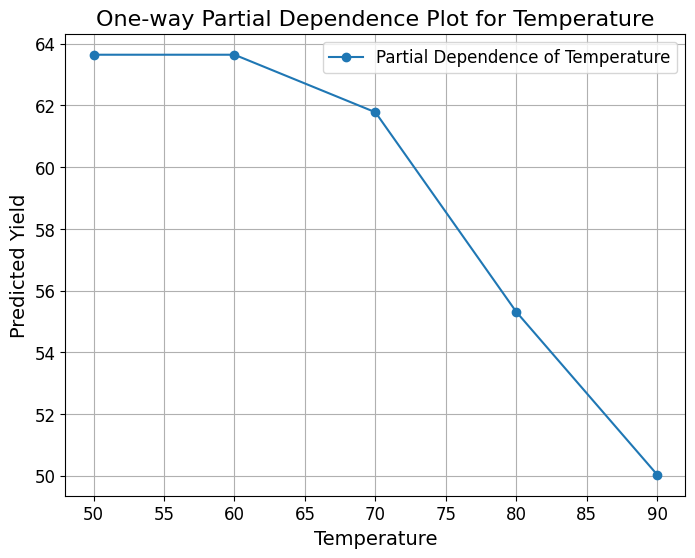

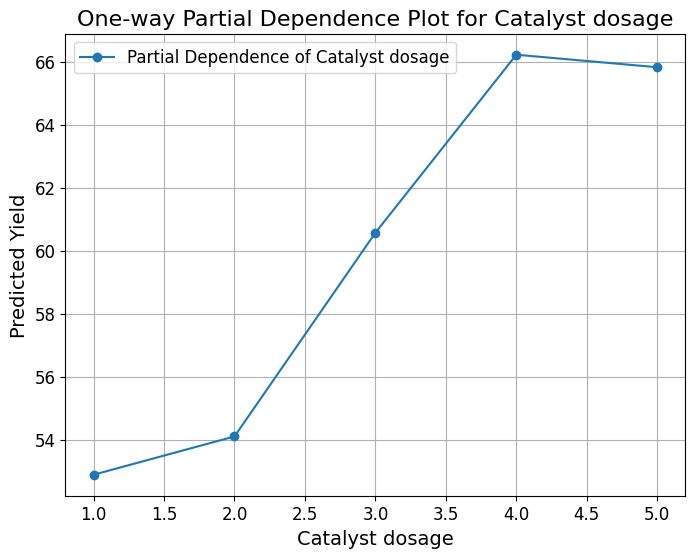

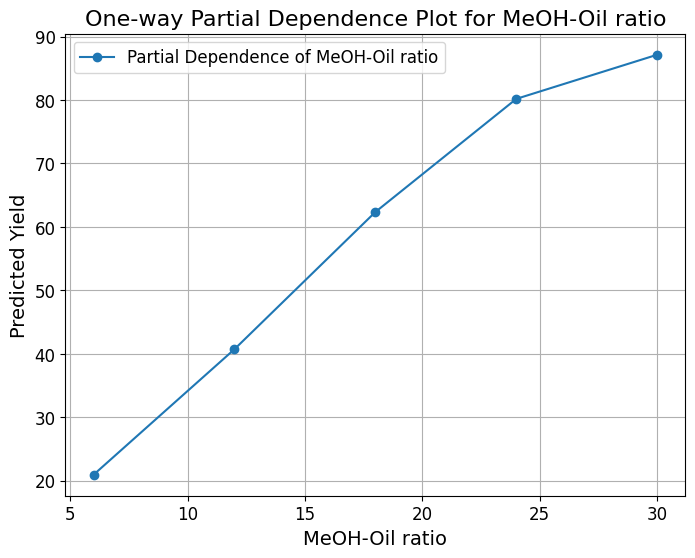

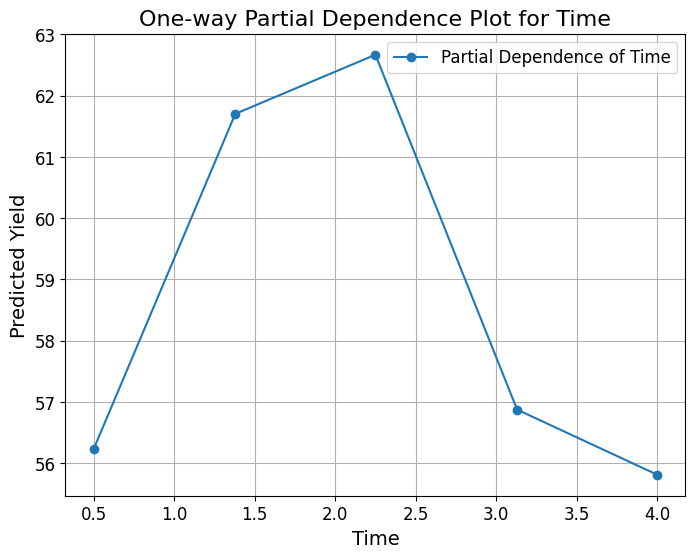

In [118]:
from sklearn.inspection import partial_dependence
# Define the features
features = ['Temperature', 'Catalyst dosage', 'MeOH-Oil ratio', 'Time']

# If target variable (y) was scaled, ensure you have its scaler
# y_scaler = MinMaxScaler()  # Use the actual scaler used for y

# Compute PDP on the scaled dataset
for feature in features:
    feature_index = data.columns.get_loc(feature)  # Get feature index in the original data
    
    pdp_results = partial_dependence(best_model, x, features=[feature_index])  # Compute PDP on scaled data

    # Unscale the feature values (x-axis)
    feature_values_scaled = np.array(pdp_results['grid_values'][0]).reshape(-1, 1)
    feature_values_unscaled = scaler_x.inverse_transform(
        np.hstack([feature_values_scaled if i == feature_index else np.zeros_like(feature_values_scaled)  
                   for i in range(x.shape[1])])  
    )[:, feature_index]  # Extract unscaled feature values

    # Unscale the predictions (y-axis) if target was scaled
    pdp_values_scaled = pdp_results['average'][0].reshape(-1, 1)  # PDP predictions
    pdp_values_unscaled = scaler_y.inverse_transform(pdp_values_scaled).flatten()  # Uncomment if y was scaled
    pdp_values_unscaled = pdp_values_scaled.flatten()  # Use directly if y was NOT scaled



    # Convert the PDP average predictions back to unscaled values
    pdp_average_scaled = pdp_results['average'][0]
    pdp_average_unscaled = scaler_y.inverse_transform(pdp_average_scaled.reshape(-1, 1)).flatten()

    # Plot the partial dependence with unscaled feature values and unscaled yield values
    plt.figure(figsize=(8, 6))
    plt.plot(feature_values_unscaled, pdp_average_unscaled, marker='o', linestyle='-',
             label=f'Partial Dependence of {feature}')
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Predicted Yield', fontsize=14)
    plt.title(f'One-way Partial Dependence Plot for {feature}', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()



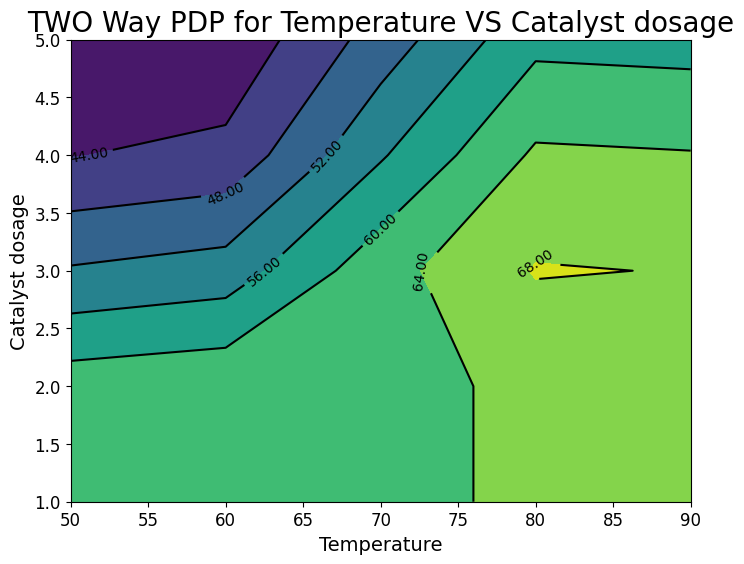

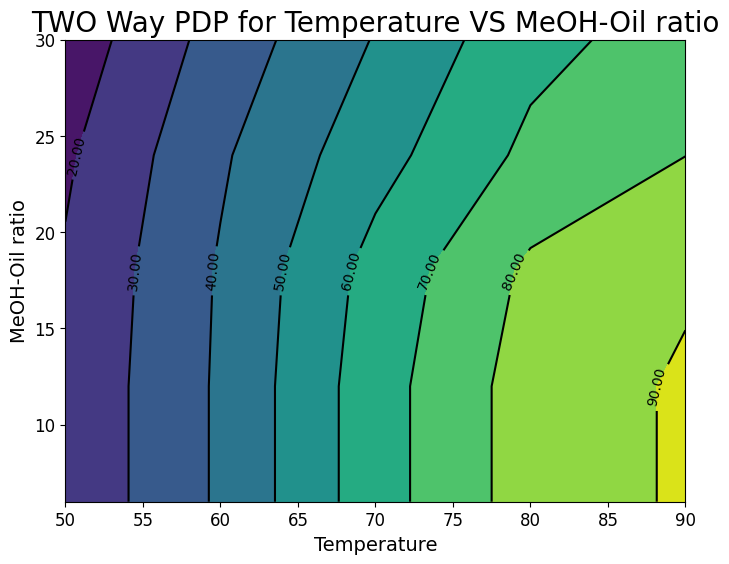

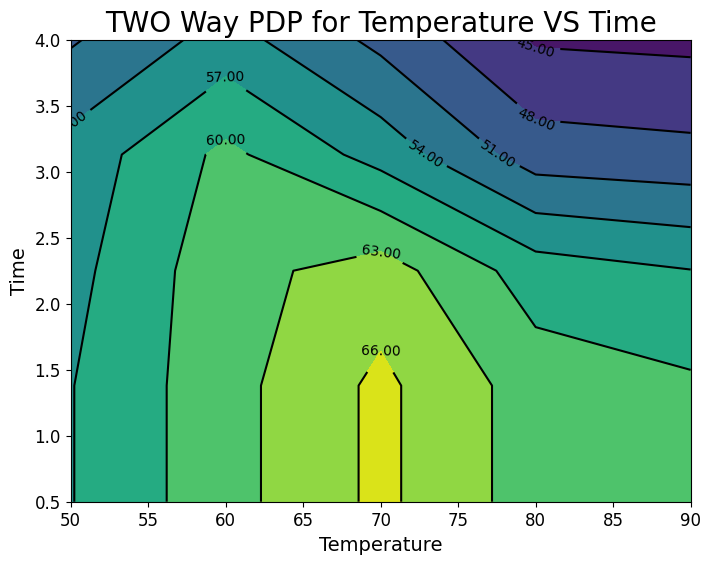

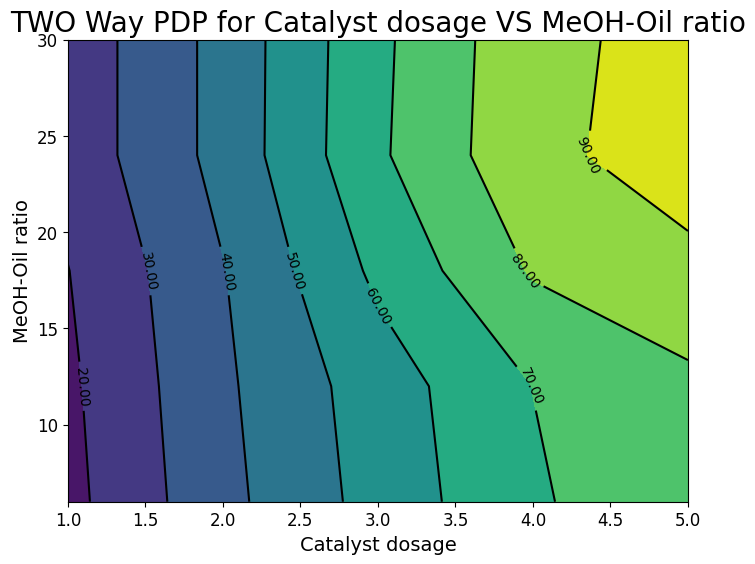

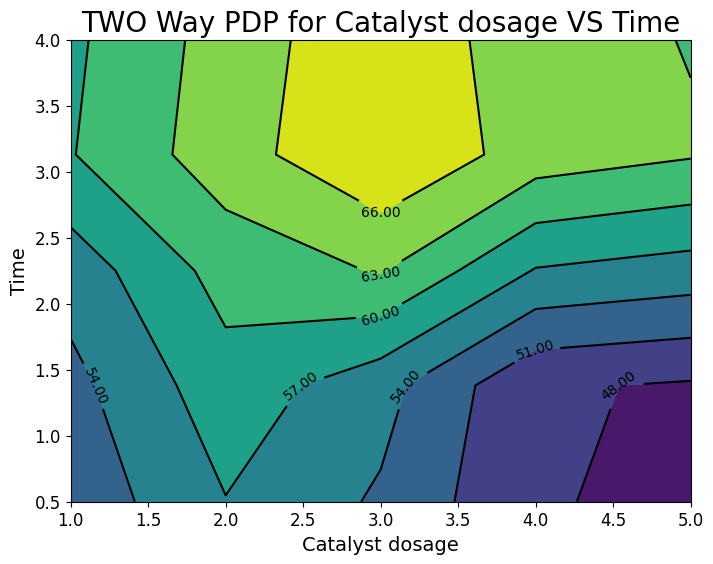

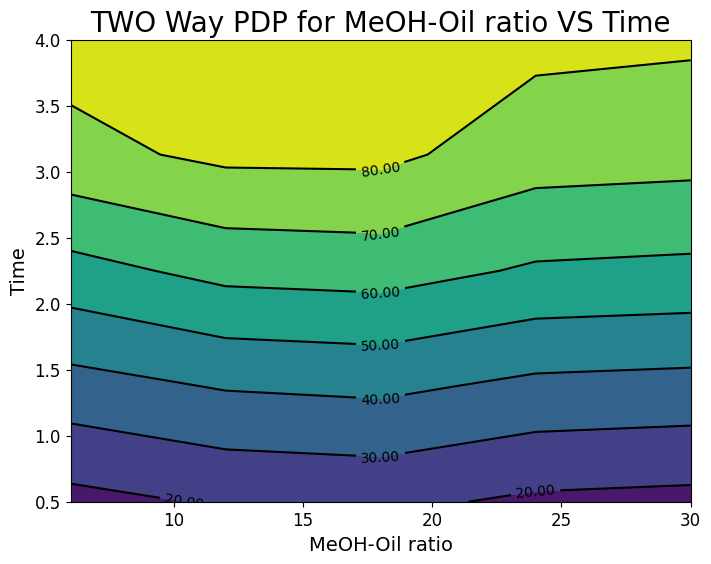

In [122]:

# Compute 2-way PDP on the scaled dataset
for i in range(len(features)):
    for j in range(i + 1, len(features)):
        feature_indices = [data.columns.get_loc(features[i]),data.columns.get_loc(features[j])]  # Get feature indices in the original data
        
        pdp_results = partial_dependence(best_model, x, features=feature_indices)  # Compute 2-way PDP on scaled data

        # Unscale the feature values (x-axis)
        feature_values_scaled_1 = np.array(pdp_results['grid_values'][0]).reshape(-1, 1)
        feature_values_scaled_2 = np.array(pdp_results['grid_values'][1]).reshape(-1, 1)
        
        feature_values_unscaled_1 = scaler_x.inverse_transform(
            np.hstack([feature_values_scaled_1 if k == feature_indices[0] else np.zeros_like(feature_values_scaled_1)  
                       for k in range(x.shape[1])])  
        )[:, feature_indices[0]]  # Extract unscaled feature values for the first feature
        
        feature_values_unscaled_2 = scaler_x.inverse_transform(
            np.hstack([feature_values_scaled_2 if k == feature_indices[1] else np.zeros_like(feature_values_scaled_2)  
                       for k in range(x.shape[1])])  
        )[:, feature_indices[1]]  # Extract unscaled feature values for the second feature

        # Convert the PDP average predictions back to unscaled values
        pdp_average_scaled = pdp_results['average'][0]
        pdp_average_unscaled = scaler_y.inverse_transform(pdp_average_scaled.reshape(-1, 1)).flatten()

        # Reshape pdp_average_unscaled to be 2D
        pdp_values_unscaled_2d = pdp_average_unscaled.reshape(len(feature_values_unscaled_1), len(feature_values_unscaled_2))

        # Plot the 2-way partial dependence with unscaled feature values and unscaled yield values
        plt.figure(figsize=(8, 6))
        contour = plt.contourf(feature_values_unscaled_1, feature_values_unscaled_2, pdp_values_unscaled_2d, cmap="viridis")
        contour_lines = plt.contour(feature_values_unscaled_1, feature_values_unscaled_2, pdp_values_unscaled_2d, colors='black')

        # Add labels directly on the contours
        plt.clabel(contour_lines, inline=True, fontsize=10, fmt="%.2f")
        plt.xlabel(features[i], fontsize=14)
        plt.ylabel(features[j], fontsize=14)
        plt.title(f'TWO Way PDP for {features[i]} VS {features[j]}', fontsize=20)
        plt.grid(False)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.show()

C:\Users\ucbab\AppData\Local\Temp\ipykernel_18864\1400527847.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


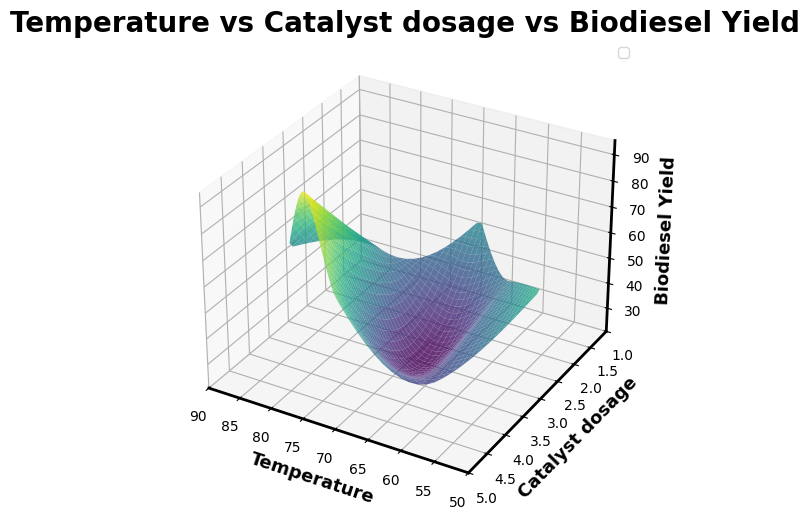

In [26]:
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

# 3D surface plot for each pair of features vs. Actual Biodiesel Yield
feature_names = ['Temperature', 'Catalyst dosage', 'MeOH-Oil ratio', 'Time']
target_name = 'Actual Biodiesel Yield'

# Helper function to plot surface
def plot_3d_surface(df, feature_x, feature_y, target, elev=30, azim=120):

    X = df[feature_x].values
    Y = df[feature_y].values
    Z = df[target].values
    # Set font and axes thickness
    plt.rcParams['axes.linewidth'] = 2.0  # Thicker axes

    
    # Create grid
    xi = np.linspace(X.min(), X.max(), 50)
    yi = np.linspace(Y.min(), Y.max(), 50)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((X, Y), Z, (xi, yi), method='cubic')

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(xi, yi, zi, cmap='viridis', alpha=0.8)

    ax.set_xlabel(feature_x, fontsize=13, fontweight='bold')
    ax.set_ylabel(feature_y, fontsize=13, fontweight='bold')
    ax.set_zlabel('Biodiesel Yield', fontsize=13, fontweight='bold')
    ax.set_xlim(X.min(), X.max())
    ax.set_ylim(Y.min(), Y.max())
    ax.set_zlim(Z.min(), Z.max())
    ax.view_init(elev=elev, azim=azim)
    plt.title(f'{feature_x} vs {feature_y} vs Biodiesel Yield', fontsize=20, fontweight='bold')
    plt.legend()
    plt.show()

# Example: Plot Temperature vs. Catalyst dosage vs. Actual Biodiesel Yield
plot_3d_surface(df_full_unscaled, 'Temperature', 'Catalyst dosage', 'Actual Biodiesel Yield')


C:\Users\ucbab\AppData\Local\Temp\ipykernel_15292\1400527847.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


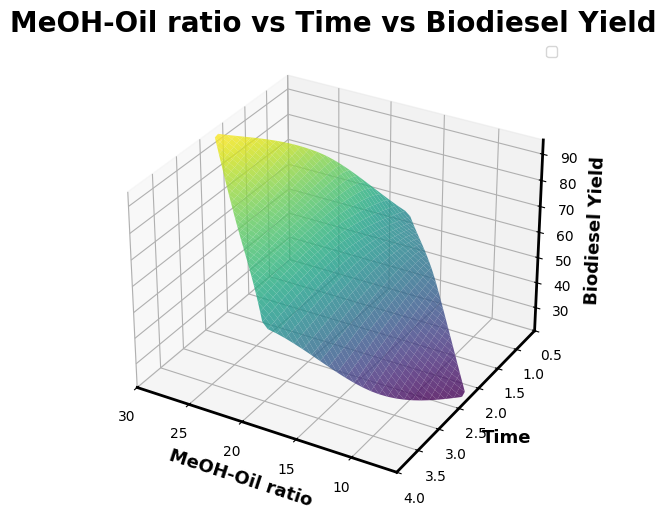

In [118]:
plot_3d_surface(df_full_unscaled, 'MeOH-Oil ratio', 'Time', 'Actual Biodiesel Yield')

C:\Users\ucbab\AppData\Local\Temp\ipykernel_15292\1400527847.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


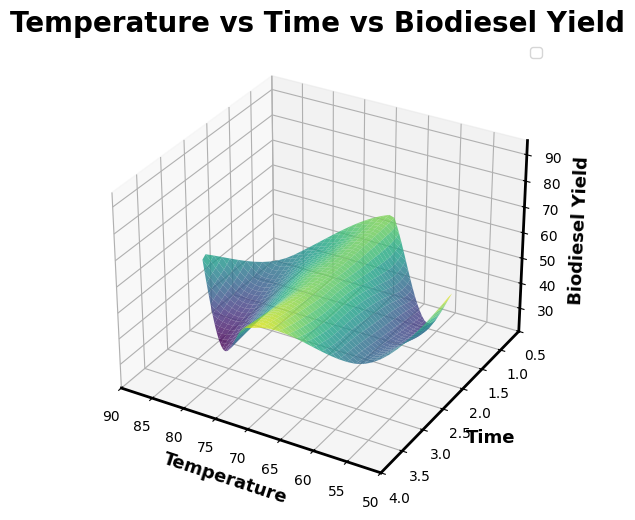

In [119]:
plot_3d_surface(df_full_unscaled, 'Temperature', 'Time', 'Actual Biodiesel Yield')

C:\Users\ucbab\AppData\Local\Temp\ipykernel_15292\1400527847.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


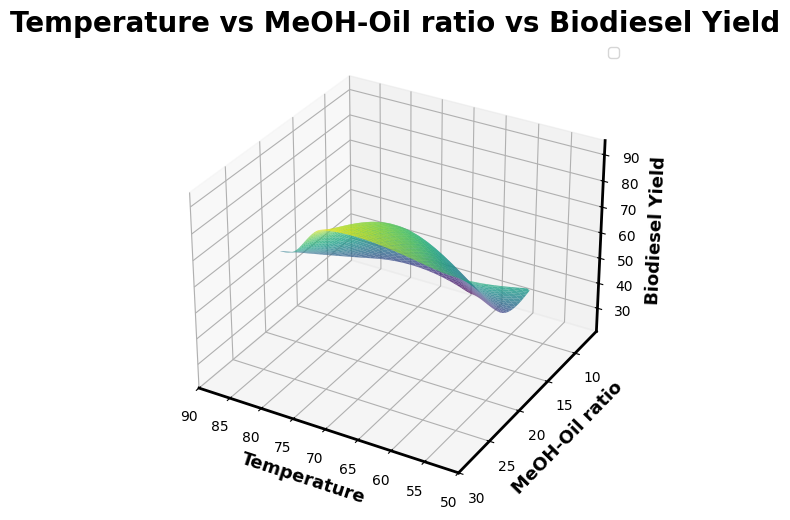

In [120]:
plot_3d_surface(df_full_unscaled, 'Temperature','MeOH-Oil ratio', 'Actual Biodiesel Yield')

C:\Users\ucbab\AppData\Local\Temp\ipykernel_15292\1400527847.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


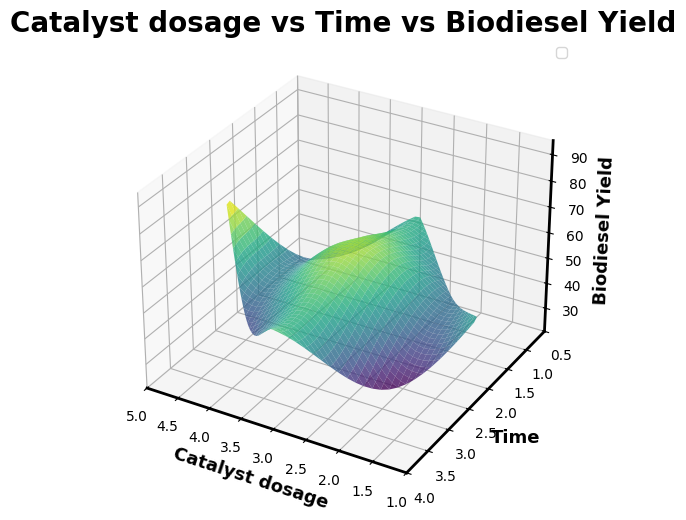

In [121]:
plot_3d_surface(df_full_unscaled, 'Catalyst dosage', 'Time', 'Actual Biodiesel Yield')

C:\Users\ucbab\AppData\Local\Temp\ipykernel_15292\1400527847.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


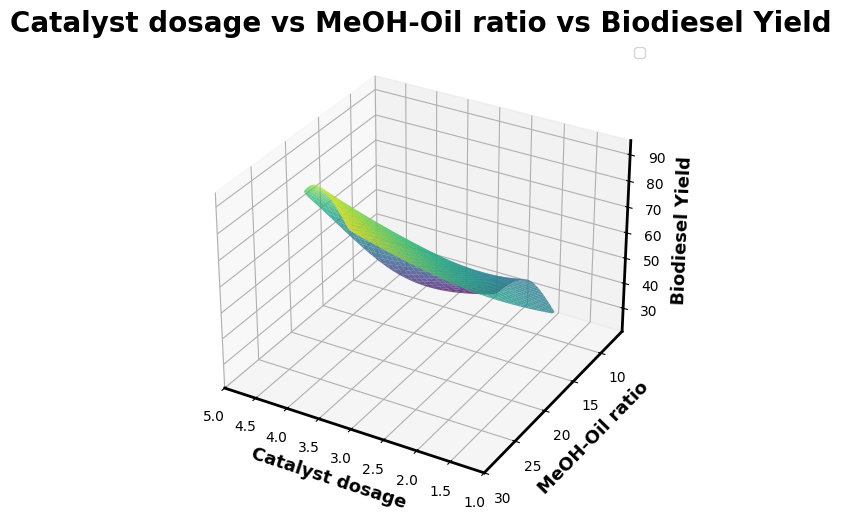

In [122]:
plot_3d_surface(df_full_unscaled,'Catalyst dosage', 'MeOH-Oil ratio', 'Actual Biodiesel Yield')

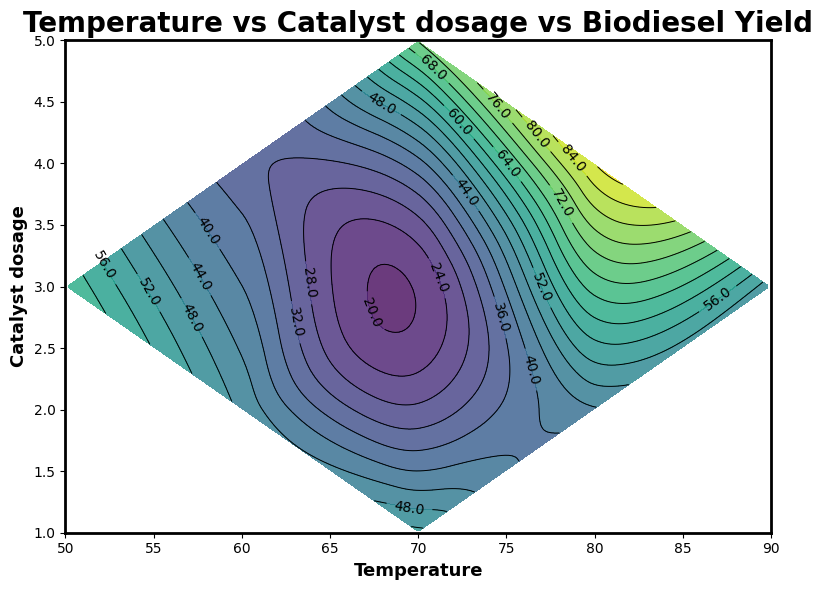

In [197]:
from scipy.interpolate import griddata
from scipy.spatial import cKDTree

def plot_2d_filled_contour(df, feature_x, feature_y, target, levels=20, crop_factor=1.5):
    X = df[feature_x].values
    Y = df[feature_y].values
    Z = df[target].values

    # Regular grid based on data range
    xi = np.linspace(X.min(), X.max(), 200)
    yi = np.linspace(Y.min(), Y.max(), 200)
    xi, yi = np.meshgrid(xi, yi)

    # Interpolate with 'cubic'
    zi = griddata((X, Y), Z, (xi, yi), method='cubic')

    
    plt.figure(figsize=(8, 6))
    contourf = plt.contourf(xi, yi, zi, levels=levels, cmap='viridis', alpha=0.8)
    contour = plt.contour(xi, yi, zi, levels=levels, colors='k', linewidths=0.7)
    plt.clabel(contour, inline=True, fontsize=10, fmt="%.1f")
    plt.xlabel(feature_x, fontsize=13, fontweight='bold')
    plt.ylabel(feature_y, fontsize=13, fontweight='bold')
    plt.title(f'{feature_x} vs {feature_y} vs Biodiesel Yield', fontsize=20, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Example usage:
plot_2d_filled_contour(df_full_unscaled, 'Temperature', 'Catalyst dosage', 'Actual Biodiesel Yield')

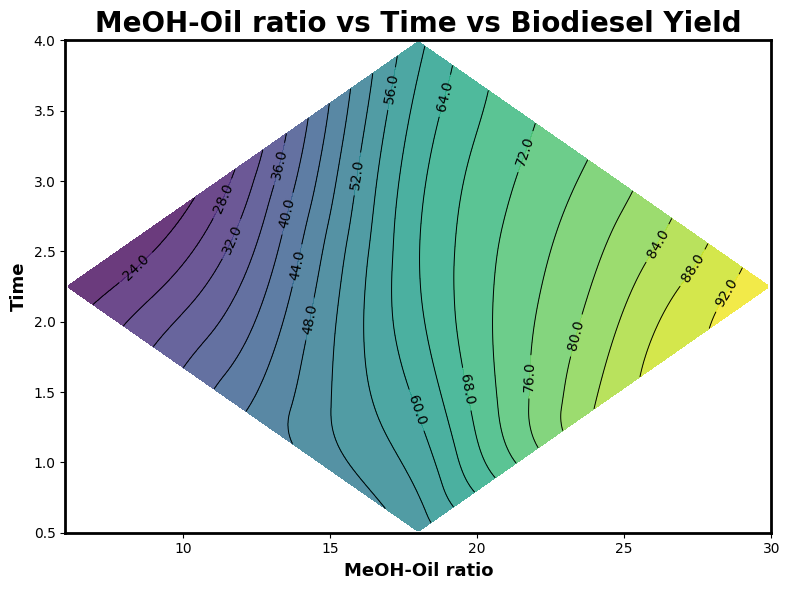

In [198]:
plot_2d_filled_contour(df_full_unscaled, 'MeOH-Oil ratio', 'Time', 'Actual Biodiesel Yield')

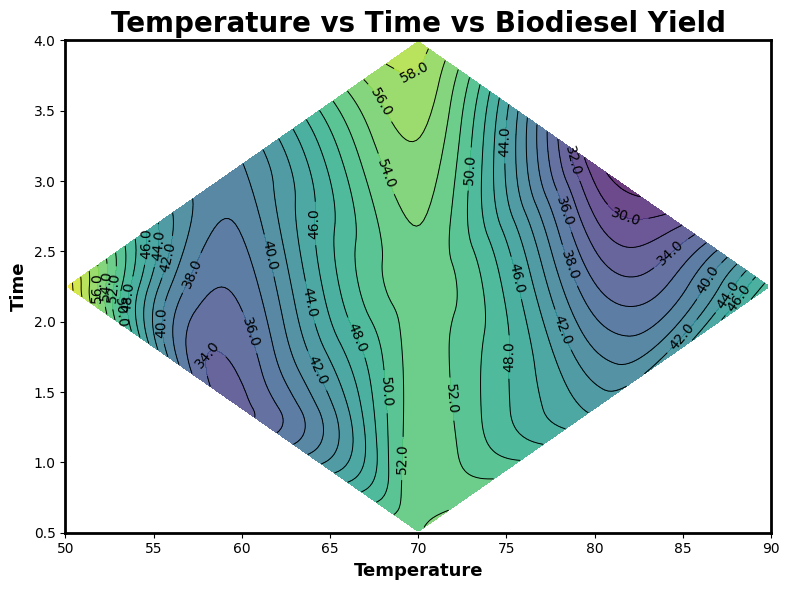

In [199]:
plot_2d_filled_contour(df_full_unscaled, 'Temperature', 'Time', 'Actual Biodiesel Yield')

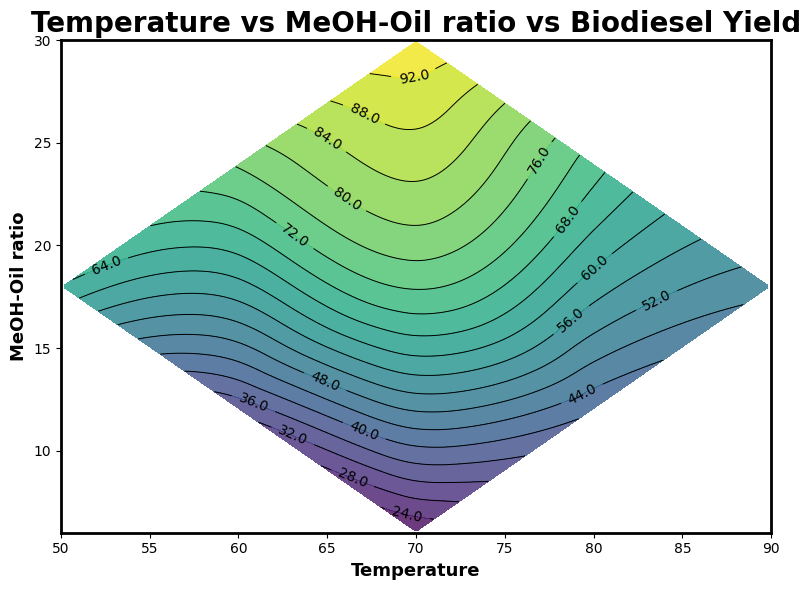

In [200]:
plot_2d_filled_contour(df_full_unscaled, 'Temperature', 'MeOH-Oil ratio', 'Actual Biodiesel Yield')

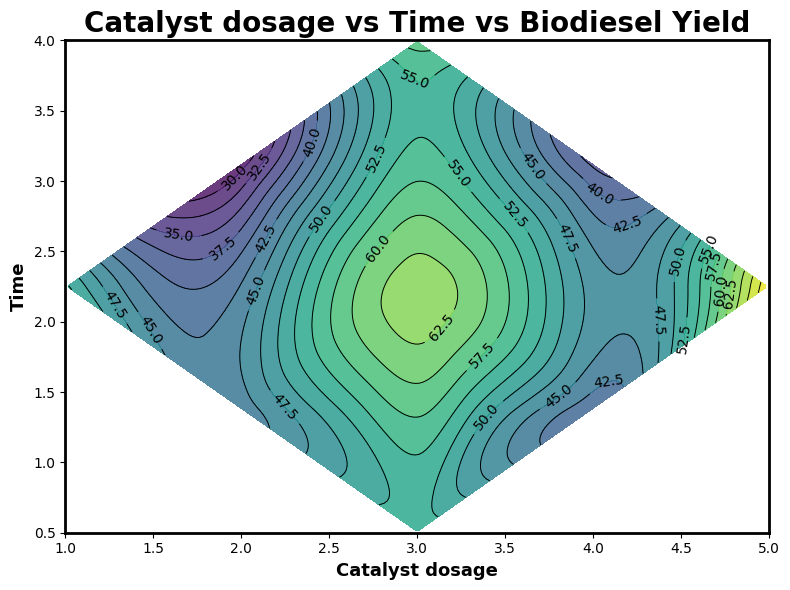

In [201]:
plot_2d_filled_contour(df_full_unscaled, 'Catalyst dosage', 'Time', 'Actual Biodiesel Yield')

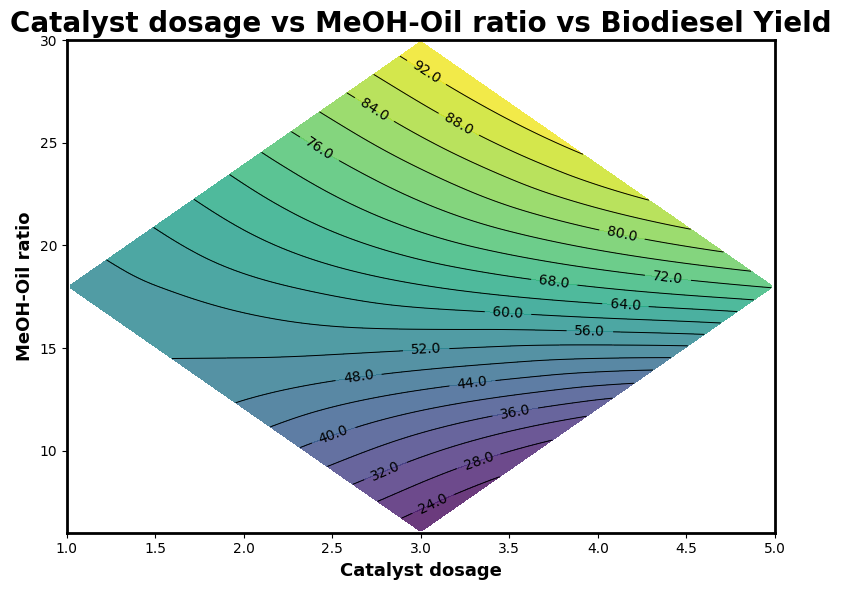

In [202]:
plot_2d_filled_contour(df_full_unscaled, 'Catalyst dosage', 'MeOH-Oil ratio', 'Actual Biodiesel Yield')

C:\Users\ucbab\AppData\Local\Temp\ipykernel_15292\1465845771.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


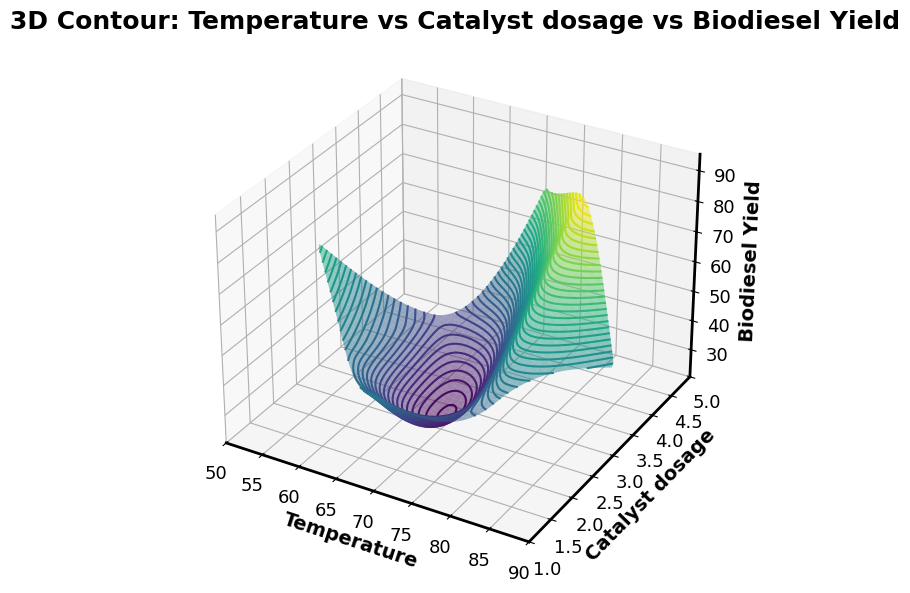

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_contour(df, feature_x, feature_y, target):
    X = df[feature_x].values
    Y = df[feature_y].values
    Z = df[target].values

    # Create grid
    xi = np.linspace(X.min(), X.max(), 100)
    yi = np.linspace(Y.min(), Y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((X, Y), Z, (xi, yi), method='cubic')

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')

    # Plot contour
    ax.contour3D(xi, yi, zi, 50, cmap='viridis', alpha=1.0)
    ax.plot_surface(xi, yi, zi, cmap='viridis', alpha=0.5)

    ax.set_xlabel(feature_x, fontsize=14, fontweight='bold')
    ax.set_ylabel(feature_y, fontsize=14, fontweight='bold')
    ax.set_zlabel('Biodiesel Yield', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    ax.tick_params(axis='z', labelsize=13)
    ax.set_xlim(X.min(), X.max())
    ax.set_ylim(Y.min(), Y.max())
    ax.set_zlim(Z.min(), Z.max())
    plt.title(f'3D Contour: {feature_x} vs {feature_y} vs Biodiesel Yield', fontsize=18, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Example: Temperature vs. Catalyst dosage vs. Actual Biodiesel Yield
plot_3d_contour(df_full_unscaled, 'Temperature', 'Catalyst dosage', 'Actual Biodiesel Yield')


C:\Users\ucbab\AppData\Local\Temp\ipykernel_15292\1465845771.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


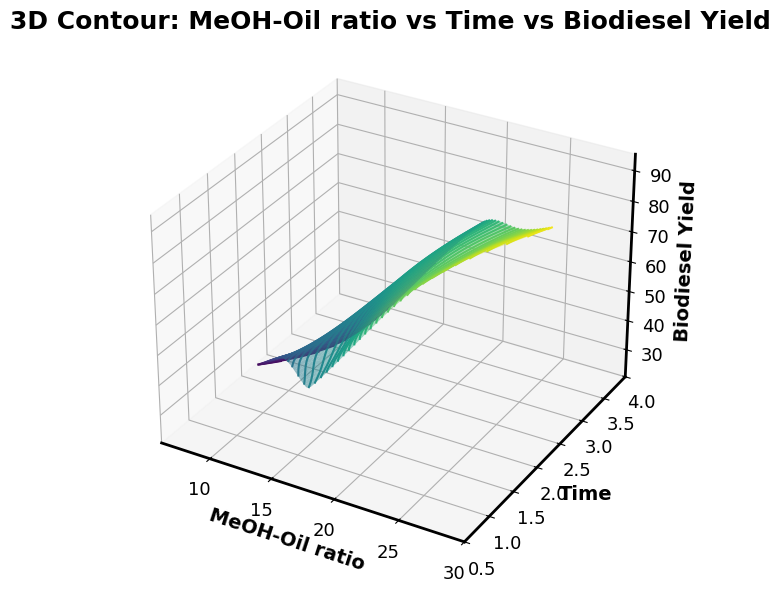

In [ ]:
plot_3d_contour(df_full_unscaled, 'MeOH-Oil ratio', 'Time', 'Actual Biodiesel Yield')


C:\Users\ucbab\AppData\Local\Temp\ipykernel_15292\1465845771.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


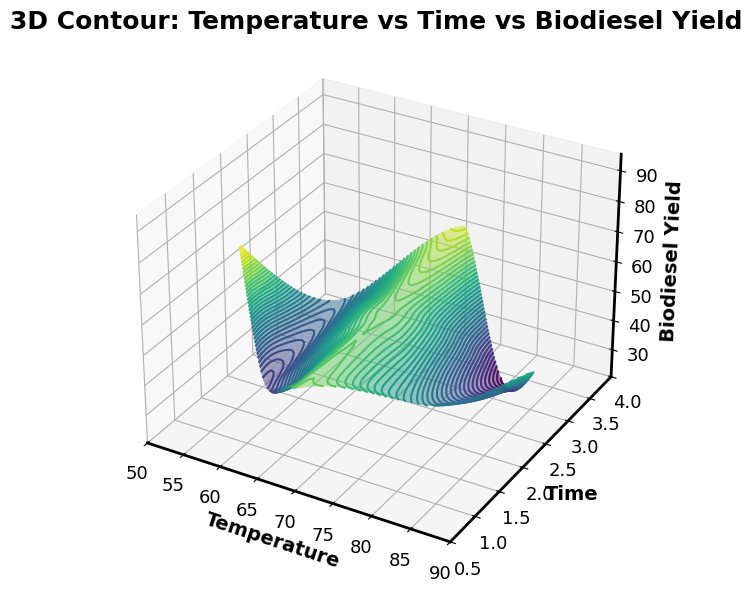

In [ ]:
plot_3d_contour(df_full_unscaled, 'Temperature', 'Time', 'Actual Biodiesel Yield')


C:\Users\ucbab\AppData\Local\Temp\ipykernel_15292\1465845771.py:31: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


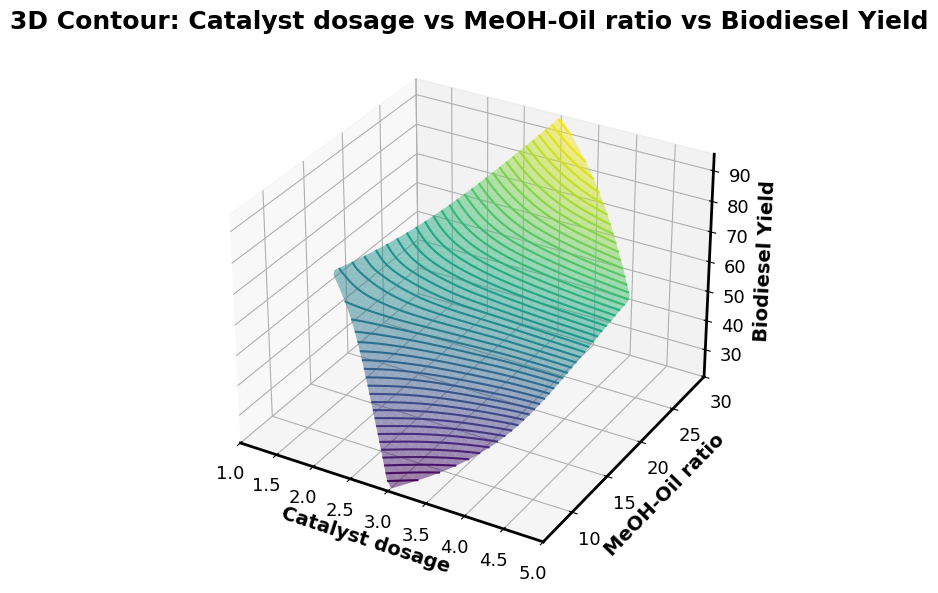

In [ ]:
plot_3d_contour(df_full_unscaled, 'Catalyst dosage', 'MeOH-Oil ratio', 'Actual Biodiesel Yield')

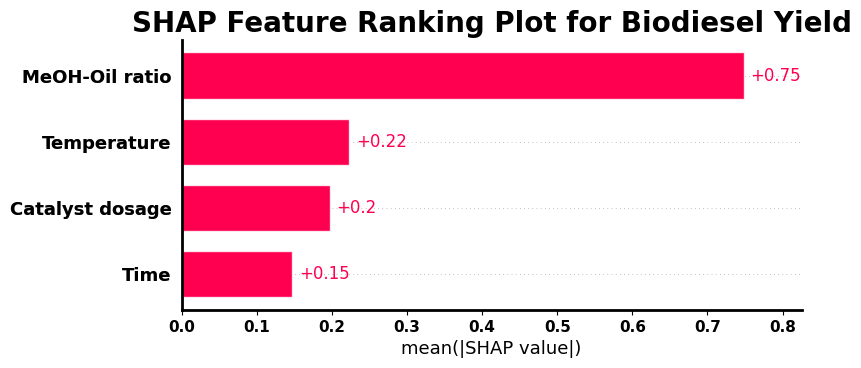

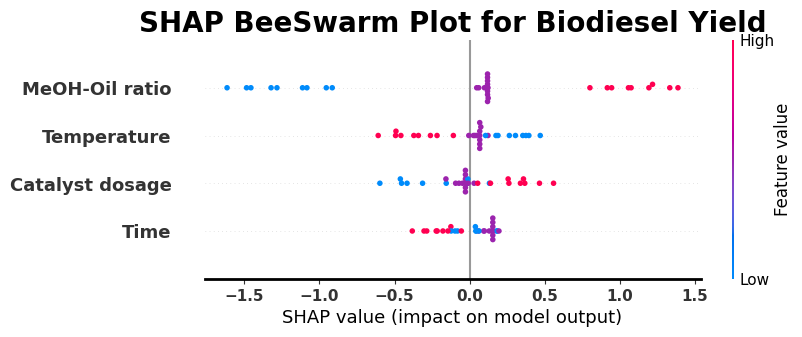

In [27]:
import shap

# Calculate SHAP values for the XGBoost model
explainer = shap.Explainer(xgb_model, x)
shap_values = explainer(x)
# Assign original feature names to SHAP values for clearer plots
shap_values.feature_names = feature_names
# Feature names for plots
feature_names = ['Temperature', 'Catalyst dosage', 'MeOH-Oil ratio', 'Time']

plt.title("SHAP Feature Ranking Plot for Biodiesel Yield", fontsize=20, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
# SHAP feature importance (bar plot)
shap.plots.bar(shap_values, max_display=len(feature_names), show=True)

plt.title("SHAP BeeSwarm Plot for Biodiesel Yield", fontsize=20, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
# SHAP beeswarm plot
shap.plots.beeswarm(shap_values, max_display=len(feature_names), show=True)

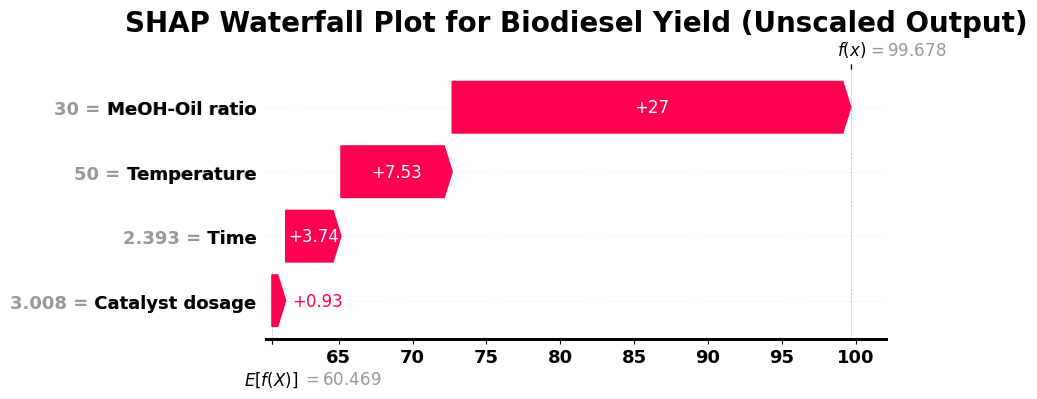

MRFO Optimized Output (Unscaled): 99.67803192138672
SHAP f(x) (Unscaled): 99.67801684657995
Difference: 1.5074806768211602e-05


In [ ]:
# Define the optimized inputs and outputs
optimized_inputs = best_inputs.reshape(1, -1)
optimized_output = best_yield
# Scale optimized inputs
optimized_inputs_scaled = scaler_x.transform(optimized_inputs)

# Compute SHAP values in scaled space 
shap_values_scaled = explainer.shap_values(optimized_inputs_scaled)

# Base value in scaled space 
base_value_scaled = explainer.expected_value

# Reconstruct f(x) in scaled space 
fx_scaled = base_value_scaled + shap_values_scaled[0].sum()

# Inverse transform f(x) and base value 
fx_unscaled = scaler_y.inverse_transform([[fx_scaled]])[0][0]
base_value_unscaled = scaler_y.inverse_transform([[base_value_scaled]])[0][0]

# Now scale SHAP contributions proportionally 
# (difference between unscaled f(x) and base value must equal sum of shap values)
scale_factor = (fx_unscaled - base_value_unscaled) / shap_values_scaled[0].sum()
shap_values_unscaled = shap_values_scaled[0] * scale_factor

#  Create SHAP explanation in unscaled space 
shap_exp = shap.Explanation(
    values=shap_values_unscaled,
    base_values=base_value_unscaled,
    data=optimized_inputs[0],   # unscaled inputs for readability
    feature_names=feature_names
)

# Plot Waterfall
plt.title("SHAP Waterfall Plot for Biodiesel Yield (Unscaled Output)", fontsize=20, fontweight='bold')
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
shap.waterfall_plot(shap_exp)

# Print comparison
print("MRFO Optimized Output (Unscaled):", optimized_output)
print("SHAP f(x) (Unscaled):", fx_unscaled)
print("Difference:", optimized_output - fx_unscaled)
